<a href="https://colab.research.google.com/github/supsi-dacd-isaac/teaching/blob/main/2021SmartGrids/L07_load_EV_profiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving 001_001.zip to 001_001.zip


In [2]:
import pandas as pd
df_trips = pd.read_pickle('001_001.zip')
df_trips.head()

,arrival_time,departure_time,km,location
670,2019-01-03 09:17:00+00:00,2019-01-03 10:58:00+00:00,4.155,Shopping
671,2019-01-03 11:06:00+00:00,2019-01-07 08:09:00+00:00,33.718,Home
672,2019-01-07 08:20:00+00:00,2019-01-07 16:49:00+00:00,6.586,Workplace
673,2019-01-07 17:00:00+00:00,2019-01-08 08:22:00+00:00,48.593,Home
674,2019-01-08 08:30:00+00:00,2019-01-08 10:32:00+00:00,6.506,Shopping


In [5]:
kWh_per_km = 0.2
soc_lost = 0
battery_capacity = 60

# create a df with two columns, one for the EV presence at the charging station, one for the difference in SOC at arrival, for the entire year 2019
df = pd.DataFrame(0, index=pd.date_range('2019-01-01', '2019-12-31 23:59:00', freq='1min', tz='UTC'), columns=['connected', 'delta_soc'])

for _, trip in df_trips.iterrows():
    soc_lost += kWh_per_km * trip['km']
    if trip['location'] == 'Home':
        connection_start = trip['arrival_time']
        connection_end = trip['departure_time'] - pd.Timedelta('1min')
        df.loc[connection_start:connection_end, 'connected'] = 1
        df.loc[connection_start, 'delta_soc'] = soc_lost % battery_capacity
        soc_lost = 0

2019-01-03 11:06:00+00:00 2019-01-07 08:08:00+00:00
2019-01-07 17:00:00+00:00 2019-01-08 08:21:00+00:00
2019-01-08 10:40:00+00:00 2019-01-09 08:13:00+00:00
2019-01-09 17:10:00+00:00 2019-01-10 06:44:00+00:00
2019-01-10 16:40:00+00:00 2019-01-11 06:41:00+00:00
2019-01-11 14:03:00+00:00 2019-01-11 16:49:00+00:00
2019-01-11 18:49:00+00:00 2019-01-14 05:35:00+00:00
2019-01-14 11:38:00+00:00 2019-01-14 16:49:00+00:00
2019-01-14 18:49:00+00:00 2019-01-15 07:09:00+00:00
2019-01-15 14:02:00+00:00 2019-01-15 20:15:00+00:00
2019-01-16 00:56:00+00:00 2019-01-16 05:49:00+00:00
2019-01-16 13:51:00+00:00 2019-01-17 06:31:00+00:00
2019-01-17 12:59:00+00:00 2019-01-18 06:33:00+00:00
2019-01-18 13:26:00+00:00 2019-01-19 07:26:00+00:00
2019-01-19 09:33:00+00:00 2019-01-21 05:37:00+00:00
2019-01-21 11:44:00+00:00 2019-01-22 05:39:00+00:00
2019-01-22 12:51:00+00:00 2019-01-22 15:15:00+00:00
2019-01-22 17:24:00+00:00 2019-01-23 05:53:00+00:00
2019-01-23 12:50:00+00:00 2019-01-24 05:34:00+00:00
2019-01-24 1

In [6]:
df.head()

,connected,delta_soc
2019-01-01 00:00:00+00:00,0,0.0
2019-01-01 00:01:00+00:00,0,0.0
2019-01-01 00:02:00+00:00,0,0.0
2019-01-01 00:03:00+00:00,0,0.0
2019-01-01 00:04:00+00:00,0,0.0


<Axes: >

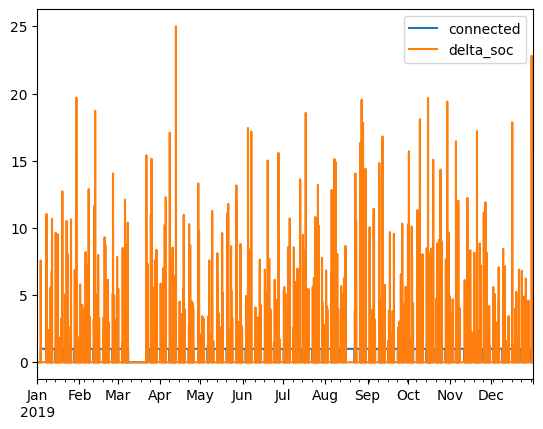

In [4]:
df.plot()